# 03.2a: Orthographic Projections in Jet Coordinate System

**Goal:** Visualize the jet and bulk tokens in the jet's *own* natural coordinate system.

We've computed the jet's principal axes (Jet-PC1, Jet-PC2, Jet-PC3). Now let's:

1. Project **all tokens** (both jet and bulk) onto the jet's top 3 PCs
2. Create three orthographic views (XY, XZ, YZ)
3. Color by **set membership**: red = jet, blue = bulk

This reveals:
- The jet's internal shape along its natural axes
- How the bulk appears when viewed in jet coordinates
- The sharpness of the boundary (clean cut vs fuzzy transition)
- Whether our PC4×5 bounds carved out a natural structure or imposed one

**Key question:** Is the jet a coherent object with clear boundaries in its own coordinate system?

## Parameters

In [13]:
TENSOR_DIR = "../data/tensors"
POINT_SIZE = 1.0
POINT_ALPHA_BULK = 0.05
POINT_ALPHA_JET = 0.3
DPI = 100

# Colors
JET_COLOR = 'red'
BULK_COLOR = 'blue'

## Imports

In [14]:
import torch
import numpy as np
from safetensors.torch import load_file
from pathlib import Path
import matplotlib.pyplot as plt

print("Imports loaded successfully.")

Imports loaded successfully.


## Step 1: Load Data

In [15]:
# Load gamma_centered (all tokens)
gamma_centered_path = Path(TENSOR_DIR) / "gamma_centered_qwen3_4b_instruct_2507.safetensors"
gamma_centered = load_file(gamma_centered_path)['gamma_centered']

N, d = gamma_centered.shape

print(f"Loaded gamma_centered:")
print(f"  Tokens: {N:,}")
print(f"  Dimensions: {d:,}")
print()

# Load jet mask
jet_mask_path = Path(TENSOR_DIR) / "jet_mask.safetensors"
jet_mask = load_file(jet_mask_path)['jet_mask']

n_jet = jet_mask.sum().item()
n_bulk = (~jet_mask).sum().item()

print(f"Loaded jet mask:")
print(f"  Jet tokens: {n_jet:,} ({n_jet/N*100:.2f}%)")
print(f"  Bulk tokens: {n_bulk:,} ({n_bulk/N*100:.2f}%)")
print()

# Load jet eigenvectors (jet's principal axes)
jet_eigenvectors_path = Path(TENSOR_DIR) / "jet_eigenvectors.safetensors"
jet_eigenvectors = load_file(jet_eigenvectors_path)['jet_eigenvectors']

print(f"Loaded jet eigenvectors:")
print(f"  Shape: {jet_eigenvectors.shape}")

Loaded gamma_centered:
  Tokens: 151,936
  Dimensions: 2,560

Loaded jet mask:
  Jet tokens: 3,055 (2.01%)
  Bulk tokens: 148,881 (97.99%)

Loaded jet eigenvectors:
  Shape: torch.Size([2560, 2560])


## Step 2: Project All Tokens onto Jet's Principal Components

In [16]:
# Extract jet's top 3 principal axes
jet_PC1 = jet_eigenvectors[:, 0]
jet_PC2 = jet_eigenvectors[:, 1]
jet_PC3 = jet_eigenvectors[:, 2]

# Verify orthogonality
print(f"Verifying jet PC orthogonality (should all be ~0):")
print(f"  Jet-PC1 · Jet-PC2 = {(jet_PC1 @ jet_PC2).item():.6e}")
print(f"  Jet-PC1 · Jet-PC3 = {(jet_PC1 @ jet_PC3).item():.6e}")
print(f"  Jet-PC2 · Jet-PC3 = {(jet_PC2 @ jet_PC3).item():.6e}")
print()

# Project ALL tokens (jet + bulk) onto jet's axes
print(f"Projecting all {N:,} tokens onto jet's top 3 PCs...")
proj_jet_PC1 = gamma_centered @ jet_PC1
proj_jet_PC2 = gamma_centered @ jet_PC2
proj_jet_PC3 = gamma_centered @ jet_PC3

print(f"\nProjection statistics (all tokens):")
print(f"  Jet-PC1: range [{proj_jet_PC1.min().item():.4f}, {proj_jet_PC1.max().item():.4f}], std = {proj_jet_PC1.std().item():.4f}")
print(f"  Jet-PC2: range [{proj_jet_PC2.min().item():.4f}, {proj_jet_PC2.max().item():.4f}], std = {proj_jet_PC2.std().item():.4f}")
print(f"  Jet-PC3: range [{proj_jet_PC3.min().item():.4f}, {proj_jet_PC3.max().item():.4f}], std = {proj_jet_PC3.std().item():.4f}")

print(f"\nProjection statistics (jet only):")
print(f"  Jet-PC1: range [{proj_jet_PC1[jet_mask].min().item():.4f}, {proj_jet_PC1[jet_mask].max().item():.4f}], std = {proj_jet_PC1[jet_mask].std().item():.4f}")
print(f"  Jet-PC2: range [{proj_jet_PC2[jet_mask].min().item():.4f}, {proj_jet_PC2[jet_mask].max().item():.4f}], std = {proj_jet_PC2[jet_mask].std().item():.4f}")
print(f"  Jet-PC3: range [{proj_jet_PC3[jet_mask].min().item():.4f}, {proj_jet_PC3[jet_mask].max().item():.4f}], std = {proj_jet_PC3[jet_mask].std().item():.4f}")

print(f"\nProjection statistics (bulk only):")
print(f"  Jet-PC1: range [{proj_jet_PC1[~jet_mask].min().item():.4f}, {proj_jet_PC1[~jet_mask].max().item():.4f}], std = {proj_jet_PC1[~jet_mask].std().item():.4f}")
print(f"  Jet-PC2: range [{proj_jet_PC2[~jet_mask].min().item():.4f}, {proj_jet_PC2[~jet_mask].max().item():.4f}], std = {proj_jet_PC2[~jet_mask].std().item():.4f}")
print(f"  Jet-PC3: range [{proj_jet_PC3[~jet_mask].min().item():.4f}, {proj_jet_PC3[~jet_mask].max().item():.4f}], std = {proj_jet_PC3[~jet_mask].std().item():.4f}")

Verifying jet PC orthogonality (should all be ~0):
  Jet-PC1 · Jet-PC2 = -2.430752e-07
  Jet-PC1 · Jet-PC3 = -1.676381e-08
  Jet-PC2 · Jet-PC3 = 1.108274e-07

Projecting all 151,936 tokens onto jet's top 3 PCs...

Projection statistics (all tokens):
  Jet-PC1: range [-0.3477, 0.6493], std = 0.0316
  Jet-PC2: range [-0.5337, 0.2358], std = 0.0268
  Jet-PC3: range [-0.5172, 0.3106], std = 0.0380

Projection statistics (jet only):
  Jet-PC1: range [-0.2721, 0.6493], std = 0.1682
  Jet-PC2: range [-0.5337, 0.2358], std = 0.1560
  Jet-PC3: range [-0.5172, 0.2705], std = 0.1488

Projection statistics (bulk only):
  Jet-PC1: range [-0.3477, 0.4265], std = 0.0194
  Jet-PC2: range [-0.4039, 0.1906], std = 0.0150
  Jet-PC3: range [-0.3630, 0.3106], std = 0.0289


## Step 3: Convert to NumPy for Plotting

In [17]:
proj_jet_PC1_np = proj_jet_PC1.cpu().numpy()
proj_jet_PC2_np = proj_jet_PC2.cpu().numpy()
proj_jet_PC3_np = proj_jet_PC3.cpu().numpy()
jet_mask_np = jet_mask.cpu().numpy()

print(f"Converted to NumPy for plotting.")

Converted to NumPy for plotting.


## Step 4: Orthographic Projections in Jet Coordinate System

Three views:
- **XY plane:** Jet-PC1 (X) vs Jet-PC2 (Y)
- **XZ plane:** Jet-PC1 (X) vs Jet-PC3 (Z)
- **YZ plane:** Jet-PC2 (Y) vs Jet-PC3 (Z)

Color by set membership: red = jet, blue = bulk

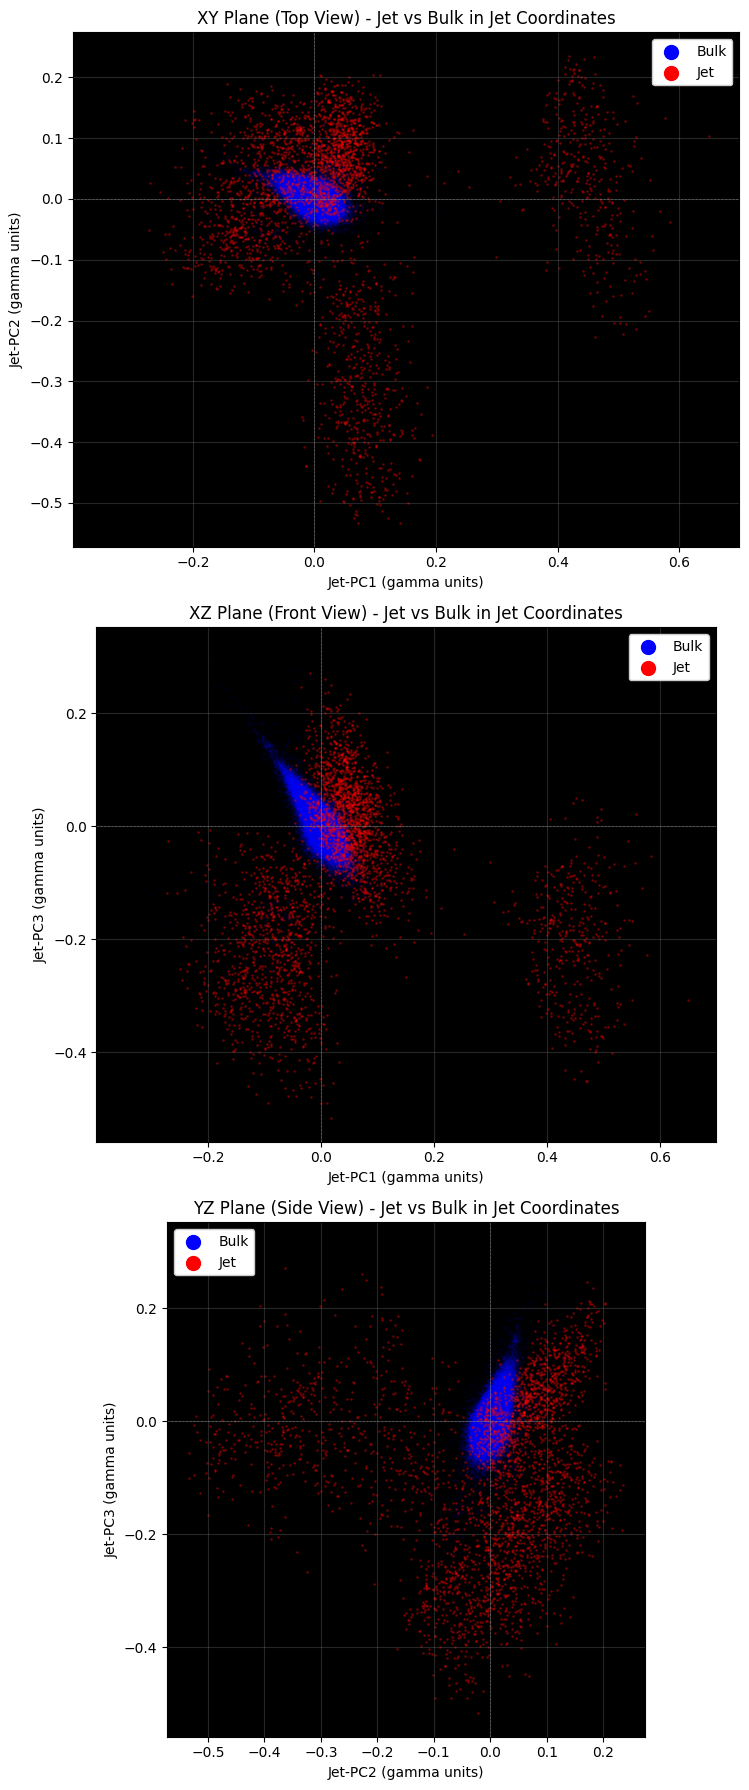


Three orthographic views in jet coordinate system.
Red = jet tokens (3,055)
Blue = bulk tokens (148,881)

Key observations to look for:
  - Is the jet elongated along Jet-PC1? (cigar vs blob)
  - Is the boundary sharp or fuzzy?
  - Does the bulk intrude into jet space, or vice versa?
  - Are there substructures within the jet?


In [18]:
fig, axes = plt.subplots(3, 1, figsize=(12, 18), dpi=DPI, facecolor='white')

# XY Plane (Jet-PC1 vs Jet-PC2)
ax = axes[0]
ax.set_facecolor('black')
# Plot bulk first (background)
ax.scatter(proj_jet_PC1_np[~jet_mask_np], proj_jet_PC2_np[~jet_mask_np],
           c=BULK_COLOR, s=POINT_SIZE, alpha=POINT_ALPHA_BULK, rasterized=True, label='Bulk')
# Plot jet on top (foreground)
ax.scatter(proj_jet_PC1_np[jet_mask_np], proj_jet_PC2_np[jet_mask_np],
           c=JET_COLOR, s=POINT_SIZE, alpha=POINT_ALPHA_JET, rasterized=True, label='Jet')
ax.set_xlabel('Jet-PC1 (gamma units)', color='black')
ax.set_ylabel('Jet-PC2 (gamma units)', color='black')
ax.set_title('XY Plane (Top View) - Jet vs Bulk in Jet Coordinates', color='black')
ax.axhline(0, color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
ax.axvline(0, color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
ax.grid(True, alpha=0.3, color='gray')
ax.tick_params(colors='black', which='both')
ax.set_aspect('equal')
legend = ax.legend(markerscale=10, framealpha=1.0)
for handle in legend.legend_handles:
    handle.set_alpha(1.0)

# XZ Plane (Jet-PC1 vs Jet-PC3)
ax = axes[1]
ax.set_facecolor('black')
ax.scatter(proj_jet_PC1_np[~jet_mask_np], proj_jet_PC3_np[~jet_mask_np],
           c=BULK_COLOR, s=POINT_SIZE, alpha=POINT_ALPHA_BULK, rasterized=True, label='Bulk')
ax.scatter(proj_jet_PC1_np[jet_mask_np], proj_jet_PC3_np[jet_mask_np],
           c=JET_COLOR, s=POINT_SIZE, alpha=POINT_ALPHA_JET, rasterized=True, label='Jet')
ax.set_xlabel('Jet-PC1 (gamma units)', color='black')
ax.set_ylabel('Jet-PC3 (gamma units)', color='black')
ax.set_title('XZ Plane (Front View) - Jet vs Bulk in Jet Coordinates', color='black')
ax.axhline(0, color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
ax.axvline(0, color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
ax.grid(True, alpha=0.3, color='gray')
ax.tick_params(colors='black', which='both')
ax.set_aspect('equal')
legend = ax.legend(markerscale=10, framealpha=1.0)
for handle in legend.legend_handles:
    handle.set_alpha(1.0)

# YZ Plane (Jet-PC2 vs Jet-PC3)
ax = axes[2]
ax.set_facecolor('black')
ax.scatter(proj_jet_PC2_np[~jet_mask_np], proj_jet_PC3_np[~jet_mask_np],
           c=BULK_COLOR, s=POINT_SIZE, alpha=POINT_ALPHA_BULK, rasterized=True, label='Bulk')
ax.scatter(proj_jet_PC2_np[jet_mask_np], proj_jet_PC3_np[jet_mask_np],
           c=JET_COLOR, s=POINT_SIZE, alpha=POINT_ALPHA_JET, rasterized=True, label='Jet')
ax.set_xlabel('Jet-PC2 (gamma units)', color='black')
ax.set_ylabel('Jet-PC3 (gamma units)', color='black')
ax.set_title('YZ Plane (Side View) - Jet vs Bulk in Jet Coordinates', color='black')
ax.axhline(0, color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
ax.axvline(0, color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
ax.grid(True, alpha=0.3, color='gray')
ax.tick_params(colors='black', which='both')
ax.set_aspect('equal')
legend = ax.legend(markerscale=10, framealpha=1.0)
for handle in legend.legend_handles:
    handle.set_alpha(1.0)

plt.tight_layout()
plt.show()

print(f"\nThree orthographic views in jet coordinate system.")
print(f"Red = jet tokens ({n_jet:,})")
print(f"Blue = bulk tokens ({n_bulk:,})")
print()
print("Key observations to look for:")
print("  - Is the jet elongated along Jet-PC1? (cigar vs blob)")
print("  - Is the boundary sharp or fuzzy?")
print("  - Does the bulk intrude into jet space, or vice versa?")
print("  - Are there substructures within the jet?")

## Summary

Visualized the token cloud in the jet's *own* coordinate system!

**What we did:**
- Projected all 151,936 tokens onto jet's top 3 principal components
- Created three orthographic views (XY, XZ, YZ)
- Colored by set membership: red = jet, blue = bulk

**What to look for:**
- **Jet shape:** Is it elongated (cigar) or roughly spherical (blob)?
- **Boundary sharpness:** Clean cut suggests natural structure, fuzzy transition suggests imposed boundaries
- **Bulk appearance:** How does the main cloud look when rotated into jet coordinates?
- **Substructure:** Are there clusters or patterns within the jet itself?

This reveals whether our PC4×5 bounds carved out a geometrically coherent object or just an arbitrary slice of the cloud.